In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_w(ins, outs):
  res = np.zeros((15, 3))
  for i, v in enumerate(ins):
    res += np.matmul(v.flatten()[np.newaxis].T ,outs[i].flatten().reshape(1, -1))
  return res

In [3]:
def sign(inp):
  res = []

  for i in inp[0]:
    if i >= 0:
      res.append(1)
    else:
      res.append(-1)

  return np.array(res)

In [4]:
def add_noise(inp, p):
  ids = np.random.choice(len(inp[0]), int(len(inp[0])*p)+1)
  # print(len(ids))
  inp_c = inp.copy()
  for i in ids:
    inp_c[0][i] += float((-2*inp_c[0][i])/np.abs(inp_c[0][i]))
  return inp_c

In [5]:
# add_noise(ins[0].flatten().reshape(1, -1), 0.3)

In [6]:
def act(c, i):
  if c > 0:
    return 1
  elif c == 0:
    return i
  else:
    return -1

### A, B, C

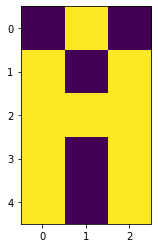

In [7]:
ina = [[-1, 1, -1], [1, -1, 1], [1, 1, 1], [1, -1, 1], [1, -1, 1]]

plt.imshow(np.array(ina))

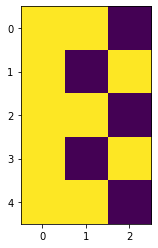

In [8]:
inb = [[1, 1, -1], [1, -1, 1], [1, 1, -1], [1, -1, 1], [1, 1, -1]]

plt.imshow(np.array(inb))

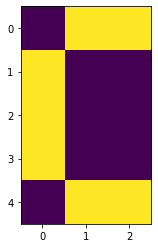

In [9]:
inc = [[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]]

plt.imshow(np.array(inc))

In [10]:
ins = np.array([ina, inb, inc])
outs = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1]])
w = gen_w(ins, outs)

In [11]:
print(w)

[[ 1. -1.  3.]
 [-3. -1. -1.]
 [ 1.  3. -1.]
 [-3. -1. -1.]
 [ 3.  1.  1.]
 [-1. -3.  1.]
 [-3. -1. -1.]
 [-1. -3.  1.]
 [ 1. -1. -1.]
 [-3. -1. -1.]
 [ 3.  1.  1.]
 [-1. -3.  1.]
 [-1. -3.  1.]
 [-1.  1.  1.]
 [-1.  1. -3.]]


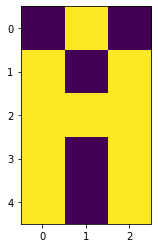

[ True  True  True]
True


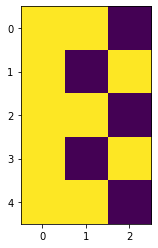

[ True  True  True]
True


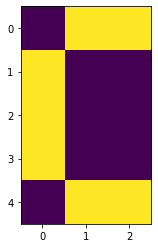

[ True  True  True]
True


In [12]:
for i, v in enumerate(ins):
  pred = sign(np.matmul(v.flatten().reshape(1, -1), w))
  plt.imshow(v)
  plt.show()
  print(pred == outs[i])
  print(np.all(pred == outs[i]))

y:  [-1 -1 -1]


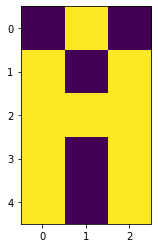

pred == ins[ 0 ] :  True
y:  [-1 -1  1]


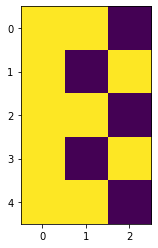

pred == ins[ 1 ] :  True
y:  [-1  1 -1]


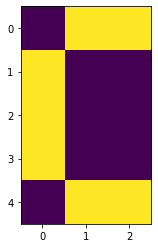

pred == ins[ 2 ] :  True


In [13]:
for i, v in enumerate(outs):
  pred = sign(np.matmul(v.flatten().reshape(1, -1), w.T))
  print('y: ', v)
  plt.imshow(pred.reshape(5,3))
  plt.show()
  print('pred == ins[', i, '] : ', np.all(pred.reshape(5,3) == ins[i]))

In [14]:
def find(inp, inps):
  for i, v in enumerate(inps):
    if np.all(v.flatten().reshape(1, -1)==inp.flatten().reshape(1, -1)):
      return i
  return -1

In [15]:
def restore(x, y, w, ins, outs):
  xl = x.copy()
  yl = y.copy()
  yp = y.copy()
  xp = x.copy()

  while True:
    # print(xl, yl)
    temp = np.matmul(yl.flatten().reshape(1, -1), w.T)
    for i, p in enumerate(temp[0]):
      xl[0][i] = act(p, xl[0][i])

    res = find(xl, ins)
    if res >= 0:
      return xl, outs[res]

    temp = np.matmul(xl.flatten().reshape(1, -1), w)
    for i, p in enumerate(temp[0]):
      yl[0][i] = act(p, yl[0][i])

    res = find(yl, outs)
    if res >= 0:
      return ins[res], yl

    if np.all(yl.flatten().reshape(1, -1) == yp.flatten().reshape(1, -1)) or np.all(xl.flatten().reshape(1, -1) == xp.flatten().reshape(1, -1)):
      return xl, yl

    yp = yl.copy()
    xp = xl.copy()

### inputs without noise

input :  0


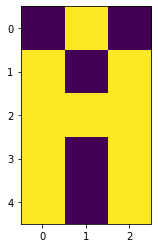

[-1 -1 -1]
input :  1


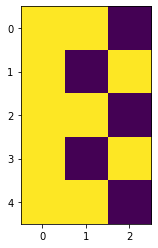

[-1 -1  1]
input :  2


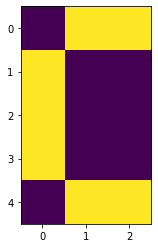

[-1  1 -1]


In [16]:
for i in range(len(ins)):
  y = outs[i].flatten().reshape(1, -1)
  x = ins[i].flatten().reshape(1, -1)
  px, py = restore(x, y, w, ins, outs)
  print('input : ', i)
  plt.imshow(px.reshape(5,3))
  plt.show()
  print(py)


### noise 10% and 40%

In [17]:
accs = []
for i in range(len(ins)):
  acc = 0
  for j in range(100):
    y = add_noise(outs[i].flatten().reshape(1, -1), 0.4)
    x = add_noise(ins[i].flatten().reshape(1, -1), 0.4)
    px, py =restore(x, y, w, ins, outs)
    acc += int(find(py, outs) >= 0)
  accs.append(acc/100)

In [18]:
accs

[0.54, 0.49, 0.54]

In [19]:
accs = []
for i in range(len(ins)):
  acc = 0
  for j in range(100):
    y = add_noise(outs[i].flatten().reshape(1, -1), 0.1)
    x = add_noise(ins[i].flatten().reshape(1, -1), 0.1)
    px, py =restore(x, y, w, ins, outs)
    acc += int(find(py, outs) >= 0)
  accs.append(acc/100)

In [20]:
accs

[0.68, 0.68, 0.66]

#(0, -1, -1)

In [21]:
px, py = restore(np.zeros((15)).flatten().reshape(1, -1), np.array([0,-1,-1]).flatten().reshape(1, -1), w, ins, outs)

pred y:  [-1 -1 -1]


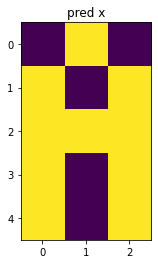

In [22]:
print('pred y: ', py)
plt.imshow(px.reshape(5,3))
plt.title('pred x')
plt.show()

### 8 char

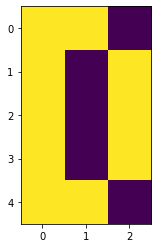

In [23]:
ind = [[1, 1, -1], [1, -1, 1], [1, -1, 1], [1, -1, 1], [1, 1, -1]]

plt.imshow(np.array(ind))

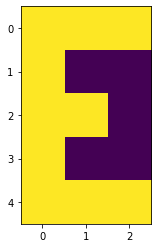

In [24]:
ine = [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]]

plt.imshow(np.array(ine))

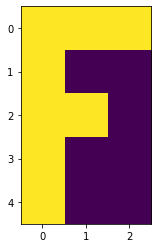

In [25]:
inf = [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, -1, -1]]

plt.imshow(np.array(inf))

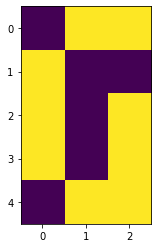

In [26]:
ing = [[-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, -1, 1], [-1, 1, 1]]

plt.imshow(np.array(ing))

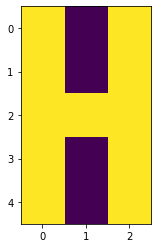

In [27]:
inh = [[1, -1, 1], [1, -1, 1], [1, 1, 1], [1, -1, 1], [1, -1, 1]]

plt.imshow(np.array(inh))

In [28]:
ins = np.array([ina, inb, inc, ind, ine, inf, ing, inh])
outs = np.array([[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])

In [29]:
w = gen_w(ins, outs)

In [30]:
print(w)

[[ 2. -2.  6.]
 [-2. -2. -2.]
 [ 6.  2. -2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-4.  0.  4.]
 [ 0.  0.  0.]
 [ 2. -6.  2.]
 [ 0.  4.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-2.  2.  2.]
 [ 0. -4.  4.]
 [-2.  2. -2.]
 [ 2.  2. -6.]]


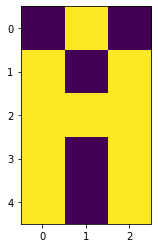

[ True  True False]
False


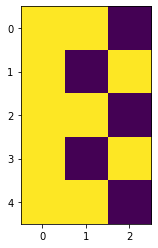

[ True  True  True]
True


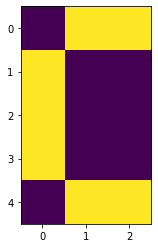

[False  True  True]
False


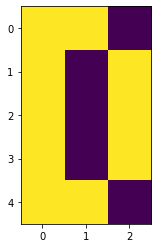

[ True  True  True]
True


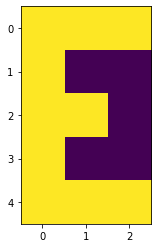

[ True  True  True]
True


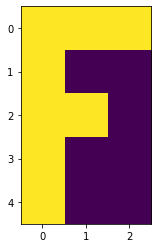

[ True  True  True]
True


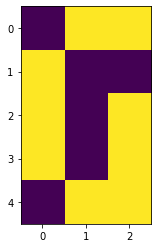

[ True  True  True]
True


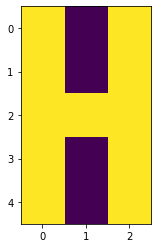

[ True False  True]
False


In [31]:
for i, v in enumerate(ins):
  pred = sign(np.matmul(v.flatten().reshape(1, -1), w))
  plt.imshow(v)
  plt.show()
  print(pred == outs[i])
  print(np.all(pred == outs[i]))

y:  [-1 -1 -1]


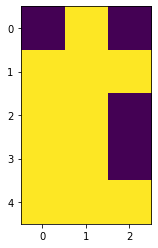

pred == ins[ 0 ] :  False
y:  [-1 -1  1]


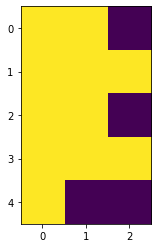

pred == ins[ 1 ] :  False
y:  [-1  1 -1]


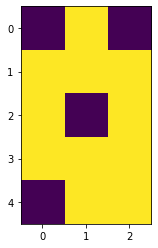

pred == ins[ 2 ] :  False
y:  [-1  1  1]


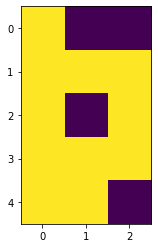

pred == ins[ 3 ] :  False
y:  [ 1 -1 -1]


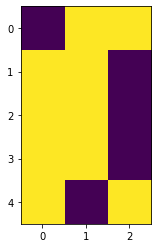

pred == ins[ 4 ] :  False
y:  [ 1 -1  1]


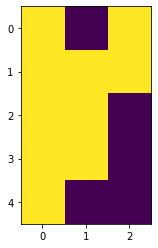

pred == ins[ 5 ] :  False
y:  [ 1  1 -1]


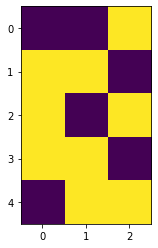

pred == ins[ 6 ] :  False
y:  [1 1 1]


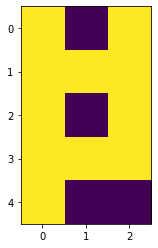

pred == ins[ 7 ] :  False


In [32]:
for i, v in enumerate(outs):
  pred = sign(np.matmul(v.flatten().reshape(1, -1), w.T))
  print('y: ', v)
  plt.imshow(pred.reshape(5,3))
  plt.show()
  print('pred == ins[', i, '] : ', np.all(pred.reshape(5,3) == ins[i]))